In [67]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.shape

(768, 9)

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

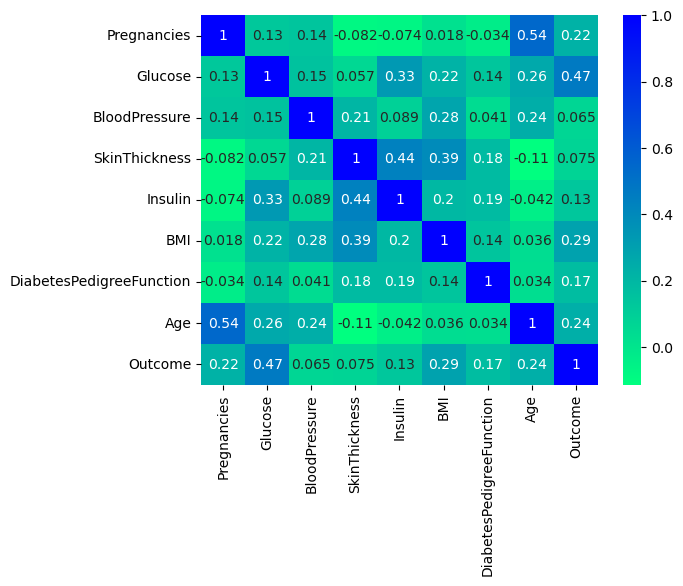

In [46]:
corr_data = df.corr()
sns.heatmap(corr_data, annot=True, cmap='winter_r')
plt.show()

In [47]:
X = df.drop(['SkinThickness', 'BloodPressure', 'Outcome'], axis=1)
y = df['Outcome']

In [48]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'n_neighbors':np.arange(1,25)}
cv_grid  = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
cv_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [53]:
cv_grid.best_params_['n_neighbors']

21

In [54]:
knn = KNeighborsClassifier(n_neighbors=cv_grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print( jaccard_score(y_test, y_pred) )

0.4583333333333333


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        99
           1       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



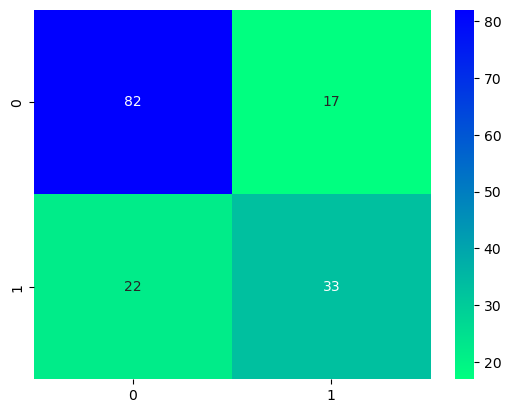

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='winter_r')
plt.show()

gonna check with another way

In [17]:
healthy = df[ df['Outcome']== 0 ]
diabete = df[ df['Outcome']== 1 ]
combined_df = pd.concat([ healthy.sample(diabete.shape[0]), diabete ])
X_new = combined_df.drop(['Outcome', 'SkinThickness', 'BloodPressure'], axis=1)
X_new = scaler.fit_transform(X_new)
y_new = combined_df['Outcome']

In [58]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [59]:
param_grid = {'n_neighbors':np.arange(1,25)}
cv_grid  = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
cv_grid.fit(X_new_train, y_new_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [63]:
knn = KNeighborsClassifier(n_neighbors=cv_grid.best_params_['n_neighbors'])
knn.fit(X_new_train, y_new_train)
y_pred = knn.predict(X_new_test)

In [ ]:
print(jaccard_score(y_new_test, y_pred))

0.6086956521739131


In [ ]:
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74        59
           1       0.68      0.86      0.76        49

    accuracy                           0.75       108
   macro avg       0.76      0.76      0.75       108
weighted avg       0.77      0.75      0.75       108



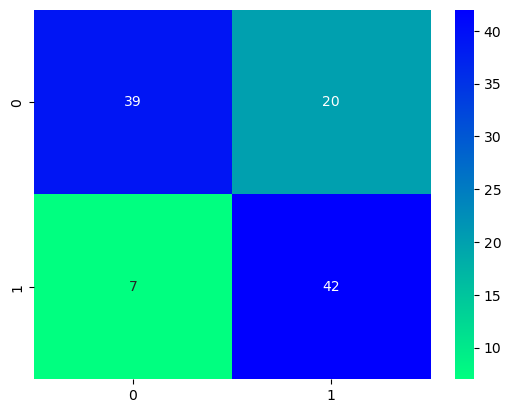

In [66]:
sns.heatmap(confusion_matrix(y_new_test, y_pred), annot=True, cmap='winter_r')
plt.show()

tryna do with Decision Tree, Random Forest, XGBoost

jaccard_score(y_test, y_pred)=0.5058823529411764
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        99
           1       0.59      0.78      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.73       154

accuracy_score(y_test, y_pred)=0.7272727272727273


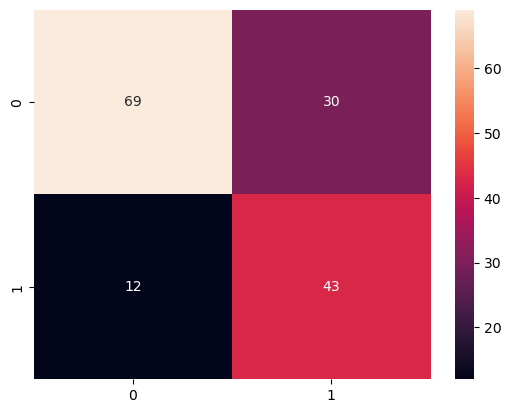

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print(f'{jaccard_score(y_test, y_pred)=}')
print(classification_report(y_test, y_pred))
print(f'{accuracy_score(y_test, y_pred)=}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

jaccard_score(y_test, y_pred)=0.4875
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

accuracy_score(y_test, y_pred)=0.7337662337662337


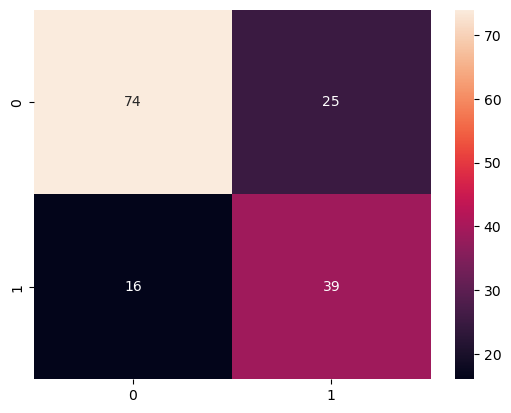

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(f'{jaccard_score(y_test, y_pred)=}')
print(classification_report(y_test, y_pred))
print(f'{accuracy_score(y_test, y_pred)=}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

jaccard_score(y_test, y_pred)=0.5194805194805194
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154

accuracy_score(y_test, y_pred)=0.7597402597402597


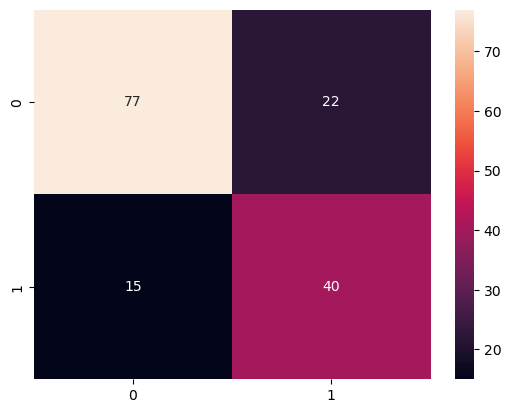

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

print(f'{jaccard_score(y_test, y_pred)=}')
print(classification_report(y_test, y_pred))
print(f'{accuracy_score(y_test, y_pred)=}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()